<a href="https://colab.research.google.com/github/pietraataulo/genshinimpact/blob/main/genshin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎮 Explorando dados de Genshin Impact
Vamos explorar dados de uma API pública feita por **fãs** de **Genshin Impact** para entender melhor sobre os personagens do jogo

> Gostaria de lembrar que os dados foram atualizados até pouco mais de setembro de 2024 e fiz essa análise por diversão :)




<img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExdW5zdTd3cWh0eXJxOGJnN3NuOXNjdWpvNTVkYTB1YXB1cTl6eGVrbCZlcD12MV9naWZzX3NlYXJjaCZjdD1n/HZzyYYSDpcfHTrQIC9/giphy.gif" width="300">

## Obtenção e leitura dos dados

In [1]:
# Importação de bibliotecas
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definindo a URL da API
base_url = "https://genshin.jmp.blue"

try:
    # Coletando informação sobre todos os personagens
    resp = requests.get(f"{base_url}/characters/all?lang=en")

    # Verificando se o status code da resposta contém 4xx ou 5xx (HTTP error)
    resp.raise_for_status()

    # Convertendo os dados de JSON para dicionário
    data = resp.json()

    # Criando o dataframe
    df = pd.DataFrame(data)

except requests.exceptions.RequestException as e:
    print(f"Request Failed: {e}")



In [3]:
# Mostra as 5 primeiras linhas do df
print(df.head())

           name                      title  vision    weapon  gender  \
0        Albedo                Kreideprinz     Geo     Sword    Male   
1     Alhaitham    Admonishing Instruction  Dendro     Sword    Male   
2          Aloy  Savior From Another World    Cryo       Bow  Female   
3         Amber           Gliding Champion    Pyro       Bow  Female   
4  Arataki Itto         Hanamizaka Heroics     Geo  Claymore    Male   

      nation          affiliation  rarity     release       constellation  \
0  Mondstadt  Knights of Favonius       5  2020-12-23  Princeps Cretaceus   
1     Sumeru     Sumeru Akademiya       5  2023-01-18       Vultur Volans   
2    Unknown    Wandering Heroine       5  2021-10-13         Nora Fortis   
3  Mondstadt  Knights of Favonius       4  2020-09-28               Lepus   
4    Inazuma     Arataki Gang Oni       5  2021-12-14    Taurus Iracundus   

   ...                                       skillTalents  \
0  ...  [{'name': 'Favonius Bladework - Wei

In [4]:
# Mostra linhas e colunas
df.shape

(92, 22)

In [5]:
# Informações sobre colunas e seus tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 92 non-null     object
 1   title                87 non-null     object
 2   vision               92 non-null     object
 3   weapon               92 non-null     object
 4   gender               87 non-null     object
 5   nation               92 non-null     object
 6   affiliation          92 non-null     object
 7   rarity               92 non-null     int64 
 8   release              92 non-null     object
 9   constellation        92 non-null     object
 10  birthday             92 non-null     object
 11  description          92 non-null     object
 12  skillTalents         92 non-null     object
 13  passiveTalents       92 non-null     object
 14  constellations       92 non-null     object
 15  vision_key           92 non-null     object
 16  weapon_typ

## Limpeza e transformações

In [6]:
# Removendo colunas não tão importantes para a análise
df = df.drop(columns=['name_key', 'outfits', 'specialDish', 'constellations', 'passiveTalents', 'skillTalents', 'ascension_materials'])

In [7]:
# Conferindo se as colunas foram removidas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           92 non-null     object
 1   title          87 non-null     object
 2   vision         92 non-null     object
 3   weapon         92 non-null     object
 4   gender         87 non-null     object
 5   nation         92 non-null     object
 6   affiliation    92 non-null     object
 7   rarity         92 non-null     int64 
 8   release        92 non-null     object
 9   constellation  92 non-null     object
 10  birthday       92 non-null     object
 11  description    92 non-null     object
 12  vision_key     92 non-null     object
 13  weapon_type    92 non-null     object
 14  id             92 non-null     object
dtypes: int64(1), object(14)
memory usage: 10.9+ KB


In [8]:
# Entendendo as linhas com gênero nulo
df[df['gender'].isnull()]

,name,title,vision,weapon,gender,nation,affiliation,rarity,release,constellation,birthday,description,vision_key,weapon_type,id
72,Traveler,NaN,Anemo,Sword,NaN,Outlander,Not affilated to any Nation,5,2020-09-28,Viator/Viatrix,Unknown,A traveler from another world who had their on...,ANEMO,SWORD,traveler-anemo
73,Traveler,NaN,Dendro,Sword,NaN,Outlander,Not affilated to any Nation,5,2022-08-24,Viator/Viatrix,Unknown,A traveler from another world who had their on...,DENDRO,SWORD,traveler-dendro
74,Traveler,NaN,Electro,Sword,NaN,Outlander,Not affilated to any Nation,5,2021-07-21,Viator/Viatrix,Unknown,A traveler from another world who had their on...,ELECTRO,SWORD,traveler-electro
75,Traveler,NaN,Geo,Sword,NaN,Outlander,Not affilated to any Nation,5,2020-09-28,Viator/Viatrix,Unknown,A traveler from another world who had their on...,GEO,SWORD,traveler-geo
76,Traveler,NaN,Hydro,Sword,NaN,Outlander,Not affilated to any Nation,5,2023-08-16,Viator/Viatrix,Unknown,A traveler from another world who had their on...,HYDRO,SWORD,traveler-hydro


In [9]:
# Removendo as linhas com gênero nulo
df = df.dropna(subset=['gender'])

In [10]:
# Transformando a coluna release em DateTime
df['release'] = pd.to_datetime(df['release'], errors='coerce')

In [11]:
# Verificando as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87 entries, 0 to 91
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           87 non-null     object        
 1   title          87 non-null     object        
 2   vision         87 non-null     object        
 3   weapon         87 non-null     object        
 4   gender         87 non-null     object        
 5   nation         87 non-null     object        
 6   affiliation    87 non-null     object        
 7   rarity         87 non-null     int64         
 8   release        87 non-null     datetime64[ns]
 9   constellation  87 non-null     object        
 10  birthday       87 non-null     object        
 11  description    87 non-null     object        
 12  vision_key     87 non-null     object        
 13  weapon_type    87 non-null     object        
 14  id             87 non-null     object        
dtypes: datetime64[ns](1), int64(1)

## Visualização

In [12]:
# Aplicando um estilo padrão nos gráficos
plt.style.use('seaborn-v0_8')

### Quais regiões possuem mais personagens?

In [13]:
# Filtrando apenas regiões conhecidas
filtered_nations = df[df['nation'] != 'Unknown']

In [14]:
# Calculando frequência de personagens por região e ordenando
characters_per_nation = filtered_nations['nation'].value_counts().sort_values()

In [15]:
# Definindo cores
colors = ['#b3cccc', '#cc6666', '#6699cc', '#66b366', '#9966cc', '#cc9966', '#66a3a3']

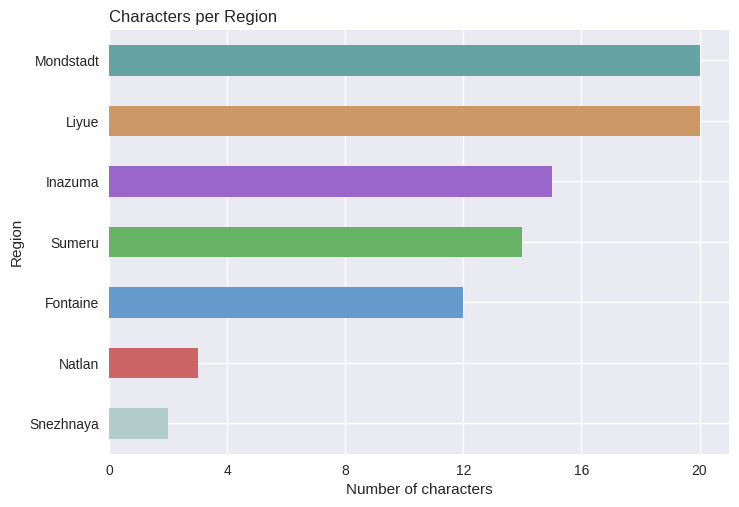

In [16]:
# Plotando gráfico de barras horizontais
characters_per_nation.plot(kind='barh', color=colors)
plt.title('Characters per Region', loc='left')
plt.ylabel('Region')
plt.xlabel('Number of characters')
plt.xticks(range(0, 21, 4))
plt.show()

> A maioria dos personagens vivem em **Mondstadt** e **Liyue**

### Quais tipos de arma são mais frequentes?

In [17]:
# Calculando a frequência de personagens por tipo de arma
weapons = df['weapon'].value_counts().sort_values()

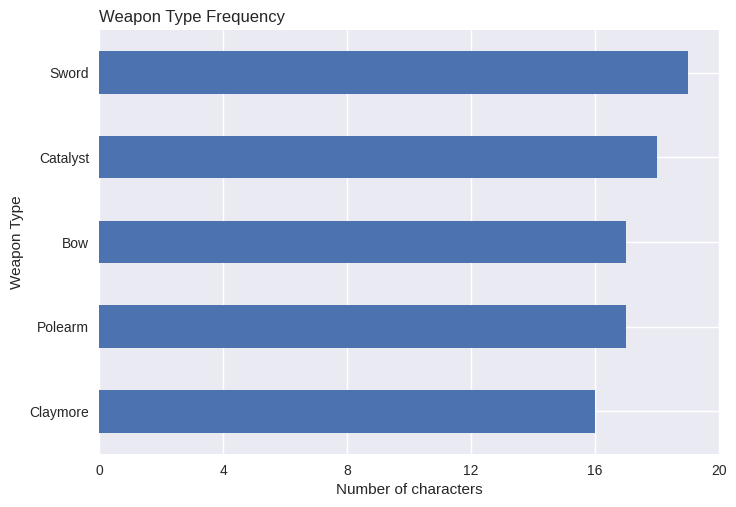

In [18]:
weapons.plot(kind='barh')
plt.title('Weapon Type Frequency', loc='left')
plt.xlabel('Number of characters')
plt.ylabel('Weapon Type')
plt.xticks(range(0, 21, 4))
plt.show()

> Os personagens têm uma preferência por **Espada** ⚔ como sua arma de combate

### Quais elementos são mais frequentes entre os personagens?

In [19]:
# Calculando a frequência de personagens por elemento
freq_elements = df['vision'].value_counts().sort_values()

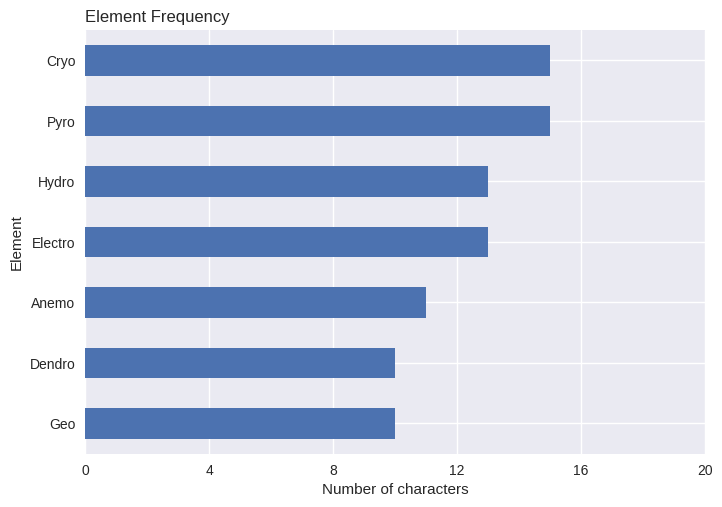

In [20]:
freq_elements.plot(kind='barh')
plt.title('Element Frequency', loc='left')
plt.xlabel('Number of characters')
plt.ylabel('Element')
plt.xticks(range(0, 21, 4))
plt.show()

> Os elementos com o maior número de usuários são **Cryo** ❄ e **Pyro** 🔥

### Existe uma relação entre elemento e tipo de arma?

In [21]:
# Contando a frequência de personagens por combinação
# crosstab() cria uma tabela que mostra a frequência das combinações entre duas variáveis qualitativas
weapon_per_element = pd.crosstab(df['weapon'], df['vision'])

In [27]:
weapon_per_element

vision,Anemo,Cryo,Dendro,Electro,Geo,Hydro,Pyro
weapon,,,,,,,
Bow,2,3,2,3,1,3,3
Catalyst,4,2,2,2,1,5,2
Claymore,1,3,2,3,3,0,4
Polearm,1,3,2,2,3,1,5
Sword,3,4,2,3,2,4,1


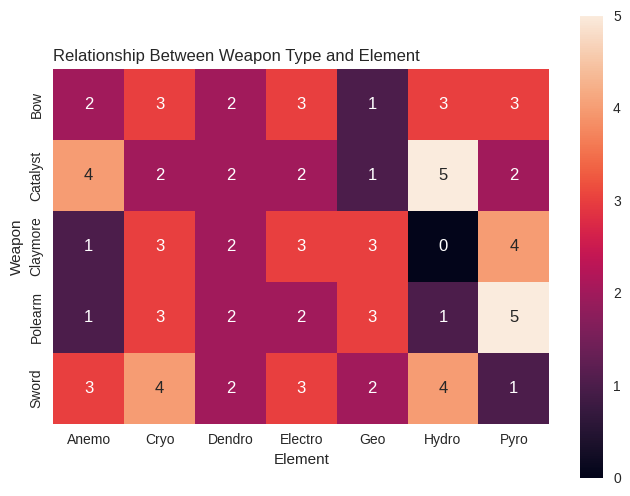

In [22]:
# Plotando um mapa de calor
# Neste caso quanto mais claro o quadrado, mais relação positiva as variáveis possuem
# Relação positiva significa que uma variável afeta a outra diretamente
plt.figure(figsize=(8, 6))
sns.heatmap(weapon_per_element, annot=True, annot_kws={"size": 12}, square=True)
plt.title('Relationship Between Weapon Type and Element', loc='left')
plt.xlabel('Element')
plt.ylabel('Weapon')
plt.show()

> É possível notar que personagens que lutam com **Catalisador** (magia) têm uma tendência a portar o elemento **Hydro** 🌊

> Enquanto personagens que lutam com **Espada** têm uma tendência a portar o elemento **Pyro** 🔥

### Qual a proporção de personagens Masculinos e Femininos?

In [23]:
# Calculando a frequência dos gêneros e arredondando o valor para inteiro
gender_count = round(df['gender'].value_counts(normalize=True) * 100)

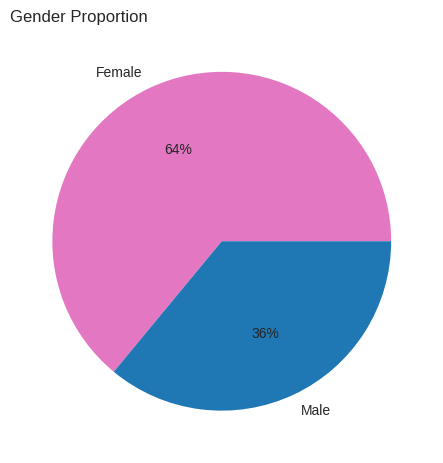

In [24]:
# Plotando um gráfico de pizza (ou torta)
gender_count.plot(kind='pie', colors=['tab:pink', 'tab:blue'], autopct='%1.0f%%')
plt.title('Gender Proportion', loc='left')
plt.ylabel('')
plt.show()

> Há muito mais personagens **femininos** que **masculinos** como personagens jogáveis 💅

### Qual a proporção de raridade 5 e 4?

In [25]:
# Calculando a frequência das raridades e arredondando para inteiro
rarity_freq = round(df['rarity'].value_counts(normalize=True) * 100)

In [26]:
rarity_freq

,proportion
rarity,
5,53.0
4,47.0


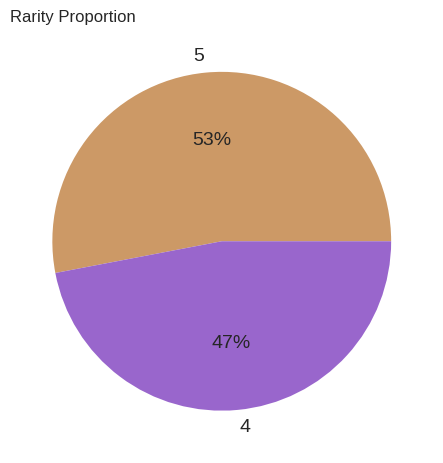

In [28]:
# Plotando um gráfico de pizza (ou torta)
rarity_freq.plot(kind='pie', autopct='%1.0f%%', colors=['#cc9966', '#9966cc'], textprops={'fontsize': 14})
plt.title('Rarity Proportion', loc='left')
plt.ylabel('')
plt.show()

> A raridade **5** é levemente mais frequente que a raridade **4**
>> Não deveria ser ao contrário? 🤔

### Existe uma relação entre Raridade e Elemento?

In [29]:
# Calculando a frequência das combinações entre raridade e elemento
element_per_rarity = pd.crosstab(df['vision'], df['rarity'])

In [30]:
element_per_rarity

rarity,4,5
vision,,
Anemo,5,6
Cryo,8,7
Dendro,4,6
Electro,8,5
Geo,5,5
Hydro,3,10
Pyro,8,7


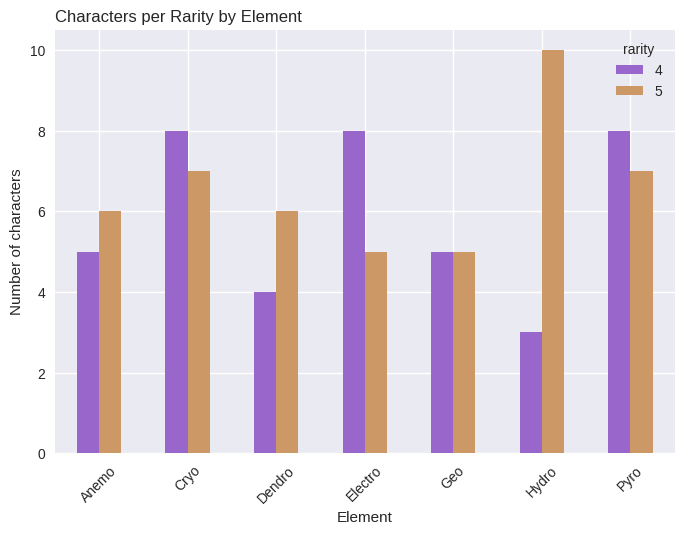

In [31]:
# Plotando um gráfico de barras com duas séries
element_per_rarity.plot(kind='bar', rot=45, color=['#9966cc', '#cc9966'])
plt.title('Characters per Rarity by Element', loc='left')
plt.ylabel('Number of characters')
plt.xlabel('Element')
plt.show()

> Enquanto **Geo** 🪨 está perfeitamente balanceado, podemos notar que há uma quantidade muito maior de personagens **Hydro** 🌊 com raridade **5** do que com raridade **4**
>> Eu tenho pena de quem é _free to play_

### Existe uma relação entre ano de lançamento do personagem e região?

In [32]:
# Extraindo o ano
year = df['release'].dt.year

In [33]:
# Agrupando os dados por região e contando a frequência
# size() conta a frequência de cada grupo e suas categorias, tranformando em uma Series com múltiplos índices
# unstack() transforma essa Series em uma tabela, transformando uma coluna agrupada em colunas diferentes da nova tabela
grouped_data = filtered_nations.groupby([year, 'nation']).size().unstack(fill_value=0)

In [34]:
grouped_data

nation,Fontaine,Inazuma,Liyue,Mondstadt,Natlan,Snezhnaya,Sumeru
release,,,,,,,
2020,0,0,9,16,0,1,0
2021,0,9,4,3,0,0,0
2022,1,4,3,0,0,0,10
2023,8,1,2,1,0,0,3
2024,3,1,2,0,3,1,1


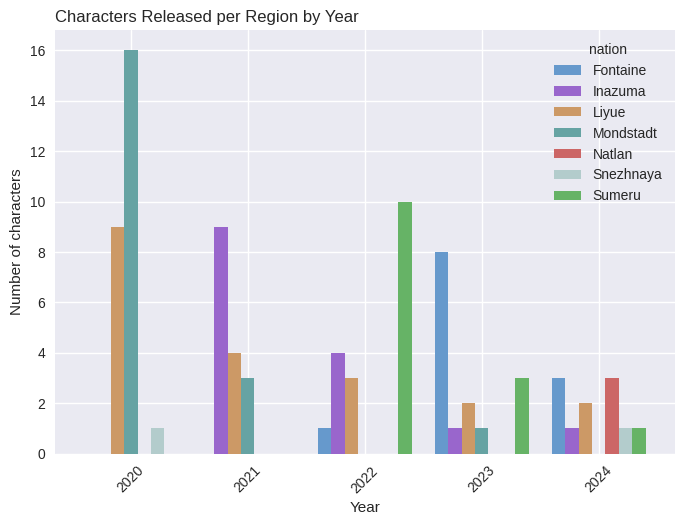

In [35]:
# Plotando um gráfico de barras com múltiplas séries
grouped_data.plot(kind='bar', rot=45, color=['#6699cc', '#9966cc', '#cc9966', '#66a3a3', '#cc6666', '#b3cccc', '#66b366'], width=0.8)
plt.title('Characters Released per Region by Year', loc='left')
plt.ylabel('Number of characters')
plt.xlabel('Year')
plt.show()


> Em cada ano, o Genshin deu prioridade para **regiões específicas**, exceto em 2024 (possivelmente por não ter dados completos)
>> Podemos afirmar então que **há** uma relação entre região e ano

---

<img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExMWF3c283MWp0aXJncGxlMGc0MWRnNjNrM3luNzkzNjVvZ3hpanExbyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/VaBgzSzlRZCgXED5Z1/giphy.gif" width="400">

